In [1]:
pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ec791845e3c5ecd250485de5be2a6839f8877630a03ff1b4c03b78ac67e9aa11
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Iris.csv')

In [5]:
# profile = ProfileReport(df, title="Irish Dataset", explorative=True)
# display(profile)

In [6]:
#Creating a copy
df_copy = df.copy ()


In [7]:
#check columns, data types, and non-null counts.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#df.head() method le first 5 rows lai print garxa
df_copy.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# df.describe() for numerical feature statistics(mean,median,mode)
df_copy.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data Quality Checks

In [10]:
#missing value list
df.isnull().sum()

#Data Cleaning
df_copy["SepalLengthCm"].fillna(df_copy["SepalLengthCm"].mode()[0], inplace=True)  #It fills all missing values (NaN) in the "sepallengthcm"
#column of the DataFrame df_copy with the most frequent (mode) value found in that column

#Dropping column named "species" due to the missing value in maximum number of rows
df_copy.drop(columns = 'Id', inplace=True)  #Replaces all NaN values in-place permantly



<ipython-input-10-157544695>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["SepalLengthCm"].fillna(df_copy["SepalLengthCm"].mode()[0], inplace=True)  #It fills all missing values (NaN) in the "sepallengthcm"


In [11]:
df_copy.drop_duplicates(inplace = True)
df_copy.duplicated().sum()

np.int64(0)

In [12]:
df_copy

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
#df.nunique()` counts the **number of unique (non-duplicate) values** in **each column** of the DataFrame `df`.
print("Unique Values:\n",df.nunique())

#Sums up the total number of unique values across all columns.
print("\nTotal Unique Values:",df.nunique().sum())

#how many times each unique value appears** in the `"sepalwidthcm"` column.
print("\nValues in Legendary Column:\n",df["SepalWidthCm"].value_counts())


#Null Values
#Checking for null value
print("List of null values:\n",df.isnull().sum())


# First sum Counts how many True values (i.e., missing values) are in each column.
#Second .sum() Adds up the null counts across all columns, giving the total number of missing values in the entire dataset.
print("\nTotal null values:",df.isnull().sum().sum())


Unique Values:
 Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

Total Unique Values: 276

Values in Legendary Column:
 SepalWidthCm
3.0    26
2.8    14
3.2    13
3.4    12
3.1    12
2.9    10
2.7     9
2.5     8
3.3     6
3.5     6
3.8     6
2.6     5
2.3     4
3.7     3
3.6     3
2.2     3
2.4     3
3.9     2
4.4     1
4.2     1
4.1     1
4.0     1
2.0     1
Name: count, dtype: int64
List of null values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Total null values: 0


In [14]:
print("Before:\n\n", df.dtypes)

# Convert 'Id' column to categorical
df_copy["Species"] = df_copy["Species"].astype("string")

# Show datatypes after change
print("\n\nAfter:\n\n", df_copy.dtypes)

Before:

 Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


After:

 SepalLengthCm           float64
SepalWidthCm            float64
PetalLengthCm           float64
PetalWidthCm            float64
Species          string[python]
dtype: object


# Visualization

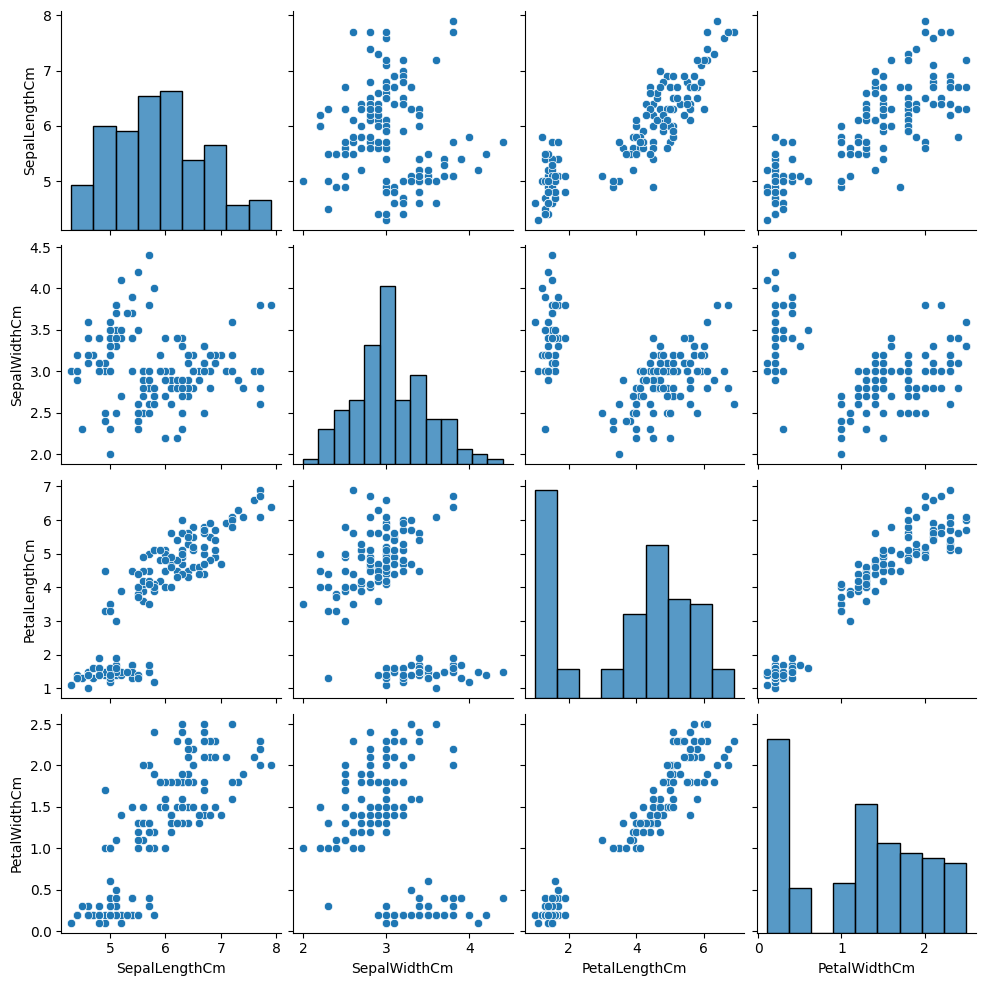

In [15]:
sns.pairplot(df_copy)

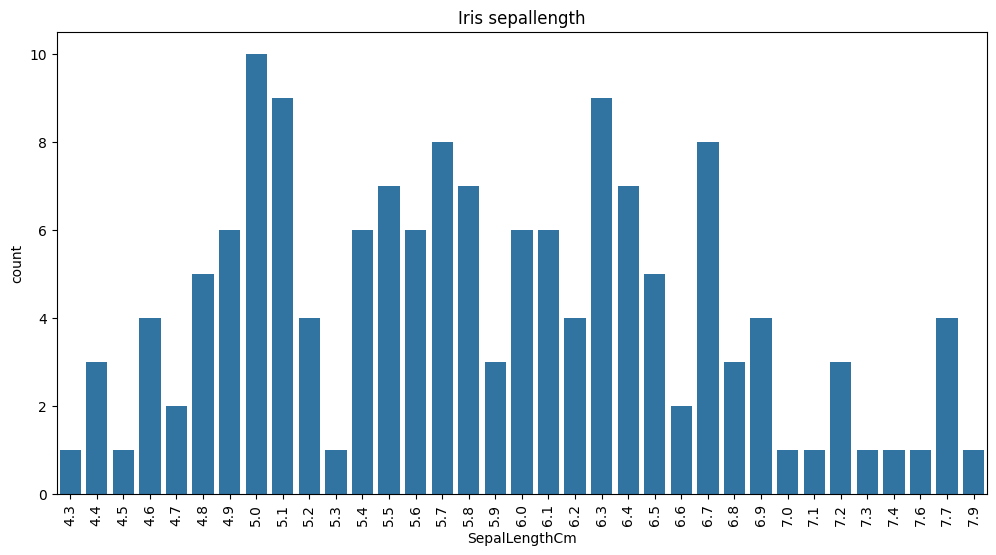

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='SepalLengthCm', data=df)
plt.title("Iris sepallength")

# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)
plt.show()

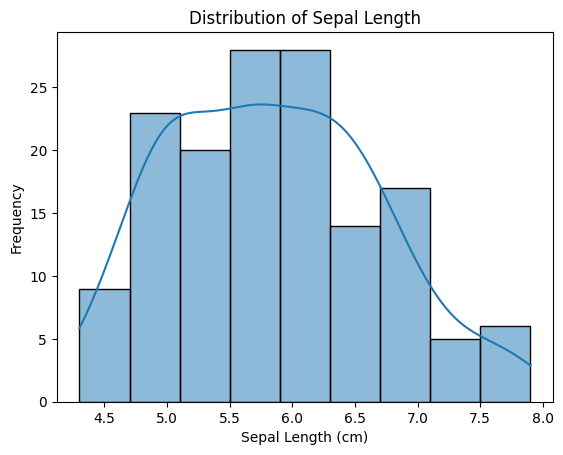

In [17]:
#Histrogram Plot
sns.histplot(df["SepalLengthCm"], kde=True)
plt.title("Distribution of Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.show()

In [18]:
# # Plotting bar chart for first 20 records to avoid clutter
# plt.figure(figsize=(12, 6))
# sns.barplot(x="Id", y="SepalLengthCm", data=df.head(20))

# plt.xlabel("ID")
# plt.ylabel("Sepal Length (cm)")
# plt.title("Sepal Length Distribution by ID (First 20 Samples)")
# plt.xticks(rotation=90)
# plt.show()

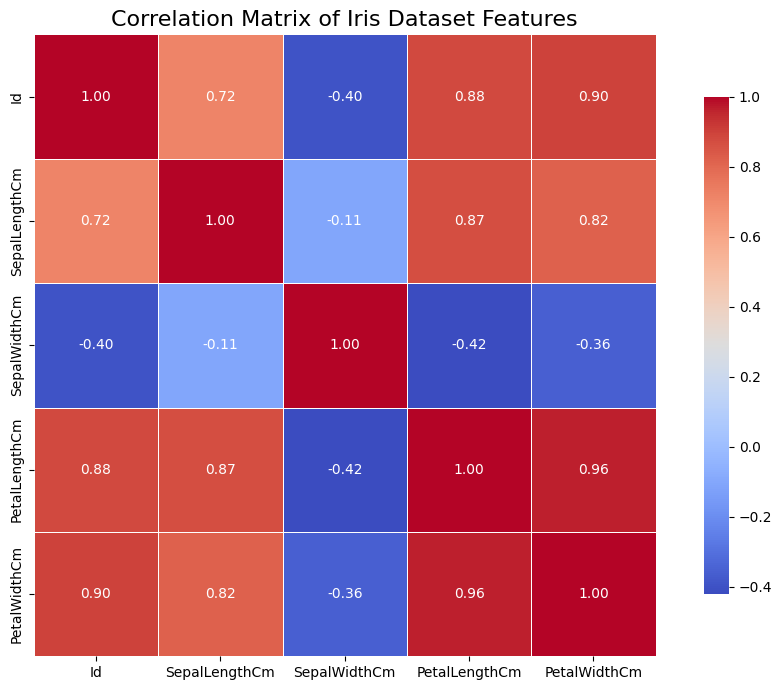

In [19]:
# Heatmap
correlation_matrix = df.corr(numeric_only=True)

# Set up the figure
plt.figure(figsize=(10, 7))  # Wider size for better clarity

# Plot heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,           # Display correlation values
    cmap='coolwarm',      # Color palette
    linewidths=0.5,       # Add lines between cells for clarity
    fmt=".2f",            # Limit decimal places
    square=True,          # Make the cells square
    cbar_kws={"shrink": 0.8}  # Shrink colorbar
)

# Title
plt.title("Correlation Matrix of Iris Dataset Features", fontsize=16)

# Show plot
plt.tight_layout()
plt.show()

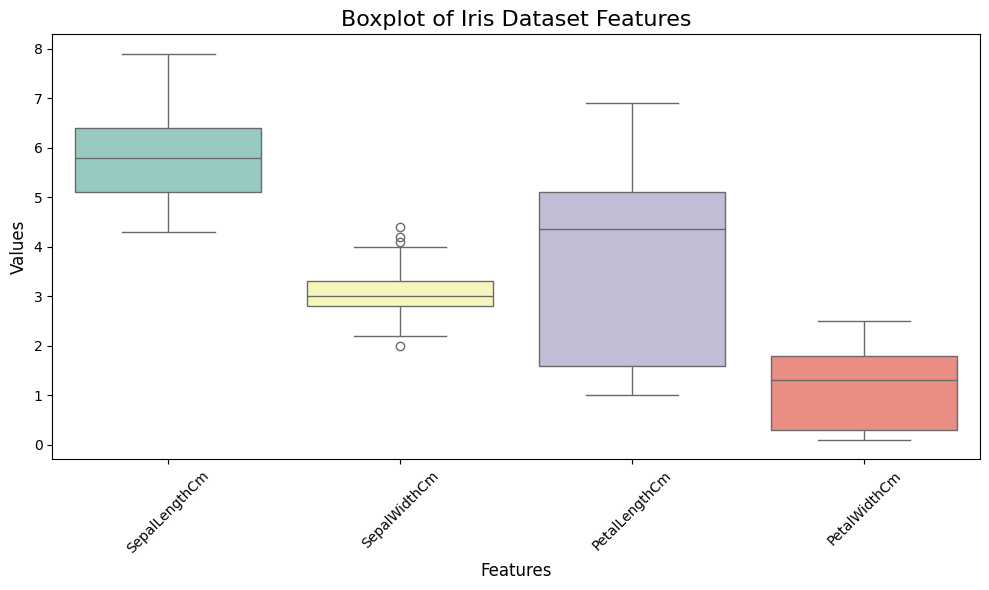

In [20]:
#Boxplot
# Ensure column names are clean
df.columns = df.columns.str.strip()

# Drop 'Id' column for visualization
df_plot = df.drop('Id', axis=1)

# Plot boxplot for all numeric features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_plot, palette="Set3")

# Set labels and title
plt.title("Boxplot of Iris Dataset Features", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


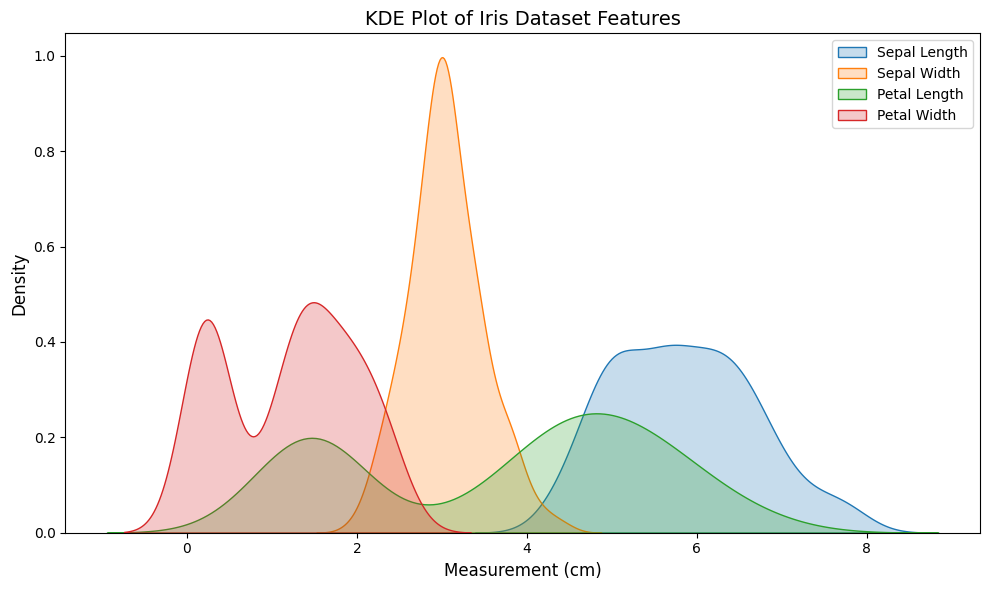

In [21]:
#KED plot
# Set figure size
plt.figure(figsize=(10, 6))

# Plot KDE for each numeric column
sns.kdeplot(df["SepalLengthCm"], label="Sepal Length", fill=True)
sns.kdeplot(df["SepalWidthCm"], label="Sepal Width", fill=True)
sns.kdeplot(df["PetalLengthCm"], label="Petal Length", fill=True)
sns.kdeplot(df["PetalWidthCm"], label="Petal Width", fill=True)

# Set labels and title
plt.title("KDE Plot of Iris Dataset Features", fontsize=14)
plt.xlabel("Measurement (cm)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Outlier Detection and Handling

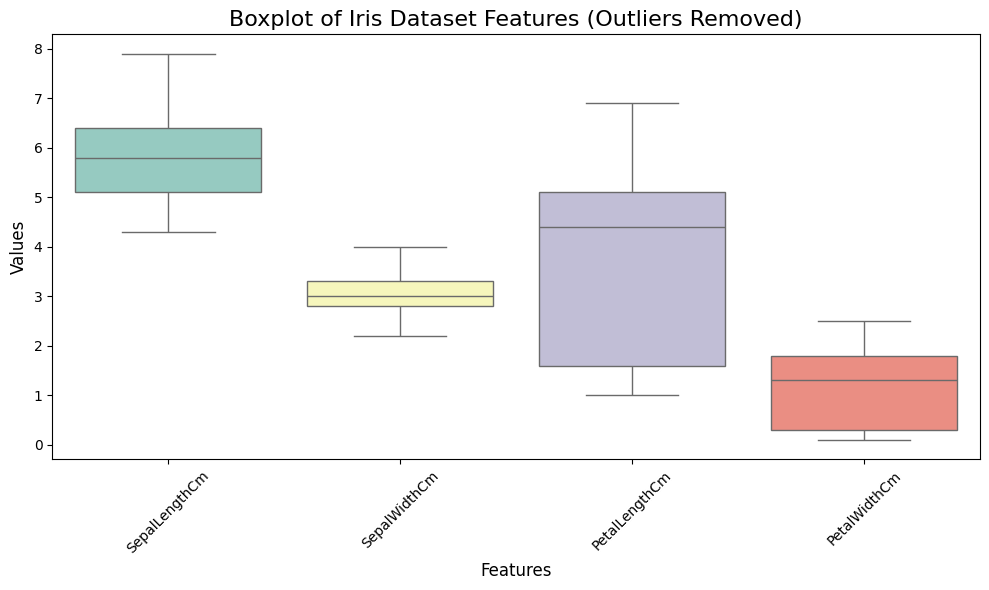

In [22]:
# Drop 'Id' column
df_copy = df.drop('Id', axis=1).copy()

# Detect and remove outliers using IQR for each numeric column
for column in df_copy.select_dtypes(include='number').columns:
    q1 = df_copy[column].quantile(0.25)
    q3 = df_copy[column].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    df_copy = df_copy[(df_copy[column] >= lower_limit) & (df_copy[column] <= upper_limit)]

# Plot boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, palette="Set3")

# Set labels and title
plt.title("Boxplot of Iris Dataset Features (Outliers Removed)", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#**Features Engineering**


In [23]:
df_copy["Length Category"] = (df_copy["SepalLengthCm"] - df_copy["SepalLengthCm"].mean()) / df_copy["SepalLengthCm"].std()


In [24]:
df_copy["Length Category"] = (df_copy["SepalWidthCm"] - df_copy["SepalWidthCm"].mean()) / df_copy["SepalWidthCm"].std()


In [25]:
df_copy["Length Category"] = (df_copy["PetalLengthCm"] - df_copy["PetalLengthCm"].mean()) / df_copy["PetalLengthCm"].std()


In [26]:
df_copy["Length Category"] = (df_copy["PetalWidthCm"] - df_copy["PetalWidthCm"].mean()) / df_copy["PetalWidthCm"].std()


In [27]:
df_copy

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Length Category
0,5.1,3.5,1.4,0.2,Iris-setosa,-1.341281
1,4.9,3.0,1.4,0.2,Iris-setosa,-1.341281
2,4.7,3.2,1.3,0.2,Iris-setosa,-1.341281
3,4.6,3.1,1.5,0.2,Iris-setosa,-1.341281
4,5.0,3.6,1.4,0.2,Iris-setosa,-1.341281
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1.420551
146,6.3,2.5,5.0,1.9,Iris-virginica,0.894488
147,6.5,3.0,5.2,2.0,Iris-virginica,1.026004
148,6.2,3.4,5.4,2.3,Iris-virginica,1.420551


In [28]:
df_copy['species_encoded'] = df_copy['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
print(df_copy.head())


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-setosa   
4            5.0           3.6            1.4           0.2  Iris-setosa   

   Length Category  species_encoded  
0        -1.341281                0  
1        -1.341281                0  
2        -1.341281                0  
3        -1.341281                0  
4        -1.341281                0  


# Classification dataset

In [29]:
# 2. Load the Iris dataset
iris = load_iris()

import pandas as pd
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
# 4. Define X (features) and y (labels)
X = df[iris.feature_names]   # X is input data: sepal and petal measurements
y = df["target"]             # y is the target class (0, 1, or 2)


In [31]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
# 5. Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# 6. Choose a classification model (Random Forest in this case)
model = LogisticRegression()

In [34]:
# 7. Training the model
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
# 8. Making  predictions on the test set
y_pred = model.predict(X_test)

print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [36]:
#Evaluate Model
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

cm = confusion_matrix(y_test, y_pred)
print(cm)

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Confusion matrix

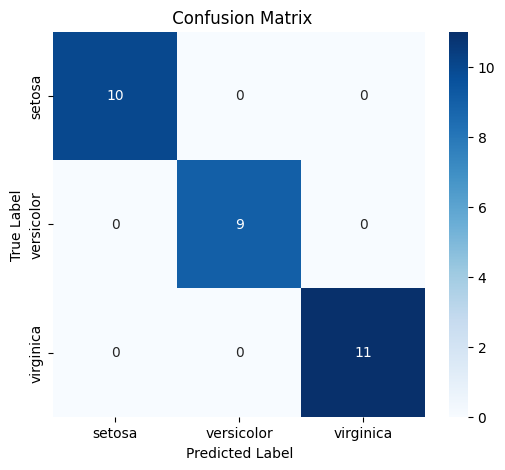

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(" Confusion Matrix")
plt.show()


#TUNING using hyperparameter

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'penalty': ["l1",'l2']
}

model = LogisticRegression(solver="liblinear")

# Grid Search with cross-validation
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_

# Prediction
y_pred = best_model.predict(X_test)

# Evaluation
print("Best Parameters:", grid.best_params_)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Best Parameters: {'C': 10.0, 'penalty': 'l1'}
Tuned Accuracy: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [43]:
import joblib


# Save model to file
joblib.dump(model, "regression_model.pkl")
joblib.dump(best_model,"fine_tuned.pkl")

['fine_tuned.pkl']

# Summarized Findings – Iris Dataset

1. Most Iris flower measurements fall within a normal range for each species.

2. The mean sepal length is around 5.8 cm, and petal length varies significantly across species.

3. Outliers were detected and removed using the IQR method.

4. No missing values or duplicate records were found in the dataset.

5. Some numeric features (e.g., petal length and petal width) show strong positive correlation, indicating potential for dimensionality reduction.